<a href="https://colab.research.google.com/github/Jonny-T87/ML-Projects/blob/main/ClassificationCustCat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **K-Nearest Neighbors Algorithm**

In [1]:
#loading libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import matplotlib.ticker as ticker
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
%matplotlib inline

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!wget -O teleCust1000.csv https://github.com/YaminiMuralidharen/MachineLearningexercises/blob/e1f836bcce8066f810c6da65b10b9ed35fb55a62/teleCust1000t.csv


--2024-06-26 01:20:57--  https://github.com/YaminiMuralidharen/MachineLearningexercises/blob/e1f836bcce8066f810c6da65b10b9ed35fb55a62/teleCust1000t.csv
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘teleCust1000.csv’

teleCust1000.csv        [ <=>                ] 335.81K  --.-KB/s    in 0.1s    

2024-06-26 01:20:58 (2.65 MB/s) - ‘teleCust1000.csv’ saved [343873]



In [3]:
#loading data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [4]:
#checking stats
df.describe()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.0220,35.526000,41.684000,0.495000,11.551000,77.535000,2.671000,10.987000,0.047000,0.517000,2.331000,2.487000
std,0.8162,21.359812,12.558816,0.500225,10.086681,107.044165,1.222397,10.082087,0.211745,0.499961,1.435793,1.120306
min,1.0000,1.000000,18.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.0000,17.000000,32.000000,0.000000,3.000000,29.000000,2.000000,3.000000,0.000000,0.000000,1.000000,1.000000
50%,2.0000,34.000000,40.000000,0.000000,9.000000,47.000000,3.000000,8.000000,0.000000,1.000000,2.000000,3.000000
75%,3.0000,54.000000,51.000000,1.000000,18.000000,83.000000,4.000000,17.000000,0.000000,1.000000,3.000000,3.000000
max,3.0000,72.000000,77.000000,1.000000,55.000000,1668.000000,5.000000,47.000000,1.000000,1.000000,8.000000,4.000000


In [5]:
#checking customer cat
df.custcat.value_counts(sort=True)

custcat
3    281
1    266
4    236
2    217
Name: count, dtype: int64

<Axes: xlabel='custcat'>

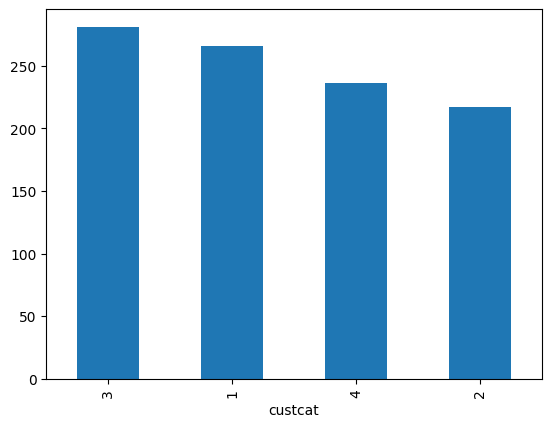

In [58]:
#checking bar chart of customer segments
df.custcat.value_counts(sort=True).plot(kind='bar')

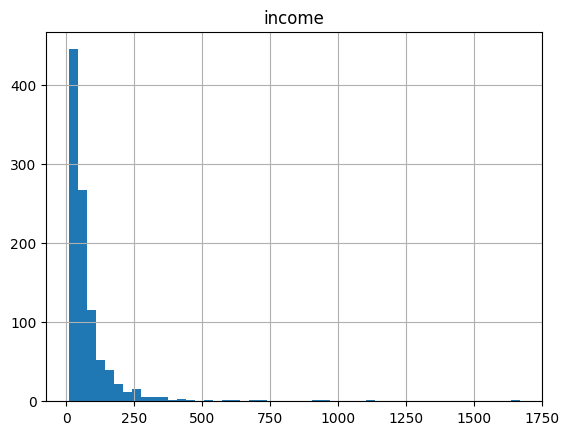

In [7]:
#histogram of income columns
df.hist(column='income', bins=50)
plt.show()

In [8]:
#spliting Features to Target
y = df['custcat'].values
X = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']]

In [9]:
y[0:5]

array([1, 4, 3, 1, 3])

In [10]:
#train test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [11]:
#printing shape of Xand y
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


In [12]:
k = 4
#Train Model and Predict
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

In [13]:
yhat = neigh.predict(x_test)
yhat[0:5]

array([3, 1, 3, 4, 4])